# Ejercicios de Learning From Data:

Mateo Andrés Manosalva Amaris

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

%matplotlib inline

df = pd.DataFrame({'x1':[0,1,0,-0.5,-1,2,1,3,0.5,-1,0,-2,-3,1,2,-4,-3,3,-0.5,-2],
                   'x2':[0,1,1,0,-1,4,-1,-5,-2,1,3,0,-1,6,8,2,3,10,2,1], 
                   'y':[1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})
df['x0'] = 1
df = df[['x0','x1', 'x2', 'y']]
    
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins)
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins)
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

#### Ejercicio 1.2
1. (a) Palabras clave con un peso positivo grande: `gratis`, `barato`, `ganar`, `!`
1. (b) Palabras clave con un peso negativo: nombre de persona, `hola`, `el`
1. (c) El parámetro $b$ en perceptrón afecta directamente la cantidad de mensajes límite que terminan siendo clasificados como spam. Esto se debe a que $b$ es el umbral utilizado para clasificar los correos electrónicos en las categorías de spam y no spam.

#### Ejercicio 1.3
1. (a) Si $x(t)$ es clasificado incorrectamente por $w(t)$, entonces $w^T(t)x(t)$ tiene signos diferentes a $y(t)$, por lo tanto $y(t)w^T(t)x(t) > 0$.
2. (b)

\begin{align*}
y(t)w^T(t+1)x(t) &= y(t) \left(w(t)+y(t)x(t)\right)^Tx(t) \\
&= y(t)\left(w^T(t) + y(t)x^T(t)\right)x(t) \\
&= y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t)\\
&> y(t)w^T(t)x(t) \\
\end{align*}

3. (c) 

Desde el problema anterior, vemos que $y(t)w^T(t)x(t)$ aumenta con cada actualización. 

Si $y(t)$ es positivo, pero $w^T(t)x(t)$ es negativo, movemos $w^T(t)x(t)$ hacia positivo aumentándolo. 

Sin embargo, si $y(t)$ es negativo, pero $w^T(t)x(t)$ es positivo, el incremento de $y(t)w^T(t)x(t)$ significa que $w^T(t)x(t)$ está disminuyendo, es decir, moviéndose hacia la región negativa. 

Por lo tanto, el paso de $w(t)$ a $w(t+1)$ es un movimiento "en la dirección correcta" en cuanto a la clasificación de $x(t)$ se refiere.


#### Ejercicio 1.10
1. (a) El valor de $\mu$ para las tres monedas es $0.5$ ya que las monedas son justas.


In [10]:
# Exercise 1.10 (a) 
total_coins = 1000
total_flips = 10
run_once(total_coins, total_flips, True)

Frequency of first coin: 0.6
Frequency of a random coin: id(838)-freq(0.5)
Frequency of the coin with minimum frequency: id(118)-freq(0.1)


(0.6, 0.5, 0.1)

Ejercicio 1.10 (b) 

(array([6.23970e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.76013e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.70000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

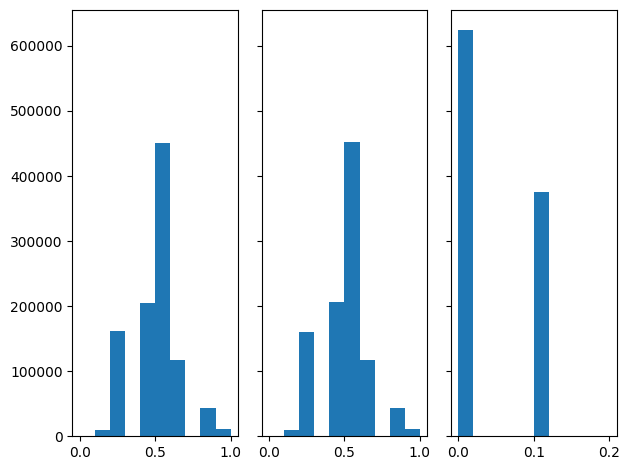

In [11]:
total_coins = 1000
total_flips = 10
total_runs = 1000000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

Ejercicio 1.10 (c)

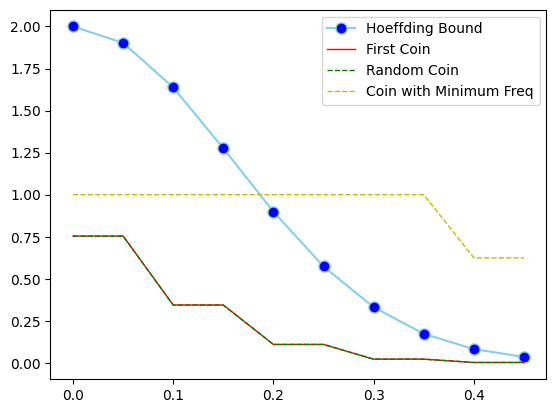

In [12]:
eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()



 (d) La primera moneda y las monedas aleatorias siguen la cota de Hoeffding. La moneda con la frecuencia mínima no cumple la cota de Hoeffding. Esto se debe a que, para las primeras dos monedas, las monedas se eligieron antes del experimento. Mientras que para la última moneda, tenemos que lanzar todas las monedas primero y utilizar los datos para determinar cuál es la moneda con la frecuencia mínima de caras. Esto viola la condición de desigualdad de Hoeffding que establece que la hipótesis $h$ se ha fijado antes de extraer las muestras.

(e) Cuando elegimos la moneda con la frecuencia mínima de caras, es como elegir el recipiente de entre 1000 recipientes (nuestro espacio de hipótesis). Pero elegimos el recipiente después de terminar de muestrear los datos. Esto se asemeja a un algoritmo de aprendizaje para la hipótesis final. Las otras dos monedas se eligieron antes del muestreo, es decir, se eligieron los recipientes de antemano.


#### Ejercicio 1.11

1. (a) $S$ no puede producir una hipótesis que garantice un rendimiento mejor que al azar en ningún punto fuera de $\mathcal{D}$. 
Si $f$ tiene 25 $+1$ en $\mathcal{D}$ pero $-1$ en todos los demás puntos en $\mathcal{X}$, $S$ elegirá la hipótesis $h_1$, la cual no coincidirá en absoluto con $f$ fuera de $\mathcal{D}$. Por otro lado, una función aleatoria tendrá $+1$ y $-1$ en partes iguales y coincidirá con $f$ la mitad del tiempo, lo cual es mejor que la función producida por $S$.

2. (b) Es posible que $C$ produzca una hipótesis mejor que la producida por $S$. Ver el ejemplo anterior.
3. (c) Si cada punto en $\mathcal{D}$ tiene un valor de 1, entonces $S$ elegirá $h_1$ y $C$ elegirá $h_2$. Por lo tanto, fuera de $\mathcal{D}$, $h_1$ tendrá un 90% de probabilidad de coincidir con $f$, mientras que $h_2$ solo tendrá un 10% de probabilidad. $S$ siempre producirá una hipótesis mejor que $C$.

4. (d) Del problema anterior, podemos ver que cuando $p \lt 0.5$, $C$ producirá una hipótesis mejor que $S$. Dado que $C$ siempre produce $h_2$, que coincide mejor con $f$ que $h_1$ si $p \lt 0.5$.

#### Ejercicio 1.12

c)

* El objetivo desconocido $f$ puede ser muy complejo y es posible que no podamos aprenderlo en absoluto.
* Si podemos aprender y producir una hipótesis $g$, dado que hay muchos puntos de datos (4000), la probabilidad de que $g$ coincida con $f$ es alta según la desigualdad de Hoeffding, y el error en $g$ podría ser pequeño ya que tenemos un gran conjunto de datos.
